In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housepricepredictiondataset/sample_submission.csv
/kaggle/input/housepricepredictiondataset/data_description.txt
/kaggle/input/housepricepredictiondataset/train.csv
/kaggle/input/housepricepredictiondataset/test.csv


## Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as mpl
import seaborn as sb
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso,Ridge,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

# 1). EXTRACTION OF  DATASET

In [75]:

train_df1=pd.read_csv("../input/housepricepredictiondataset/train.csv")
test_df1=pd.read_csv("../input/housepricepredictiondataset/test.csv")
train_ID = train_df1['Id']
test_ID = test_df1['Id']

train_df1.drop("Id", axis = 1, inplace = True)
test_df1.drop("Id", axis = 1, inplace = True)

print(train_df1.shape)
print(test_df1.shape)
train_df1.head()

(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2).DATAYPE OF EACH COLUMN

In [76]:
 ## visulaizing datatypes of each column
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [77]:
print("dtypes: float64(3), int64(34), object(43)")

dtypes: float64(3), int64(34), object(43)


# 3).EDA-1

## A).univariate study on target Insights on the Sale Price- Target column -so as to view the univariate distribution of trget

1.8828757597682129
6.536281860064529


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

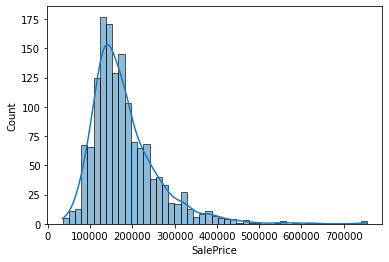

In [78]:
sb.histplot(train_df1.SalePrice,kde=True,)

print(train_df1.SalePrice.skew())

print(train_df1.SalePrice.kurtosis())
train_df1.SalePrice.describe()


#### From above univariate analysis of the Sales price target column we observe that the dustribution is right skewed, IN PARTICULAR POSITIVE SKEWED.

### 
1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)

## B.Tackling missing values

In [79]:
missing_df1=train_df1.isnull().sum()
missing_df1.sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [80]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train_df1.columns if train_df1[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(train_df1[feature].isnull().mean()*100, 4), '%  of missing values----->',train_df1[feature].dtype)

LotFrontage 17.7397 %  of missing values-----> float64
Alley 93.7671 %  of missing values-----> object
MasVnrType 0.5479 %  of missing values-----> object
MasVnrArea 0.5479 %  of missing values-----> float64
BsmtQual 2.5342 %  of missing values-----> object
BsmtCond 2.5342 %  of missing values-----> object
BsmtExposure 2.6027 %  of missing values-----> object
BsmtFinType1 2.5342 %  of missing values-----> object
BsmtFinType2 2.6027 %  of missing values-----> object
FireplaceQu 47.2603 %  of missing values-----> object
GarageType 5.5479 %  of missing values-----> object
GarageYrBlt 5.5479 %  of missing values-----> float64
GarageFinish 5.5479 %  of missing values-----> object
GarageQual 5.5479 %  of missing values-----> object
GarageCond 5.5479 %  of missing values-----> object
PoolQC 99.5205 %  of missing values-----> object
Fence 80.7534 %  of missing values-----> object
MiscFeature 96.3014 %  of missing values-----> object


## C.VISUALIZE MISSING VALUES THROUGH HEATMAP

<AxesSubplot:>

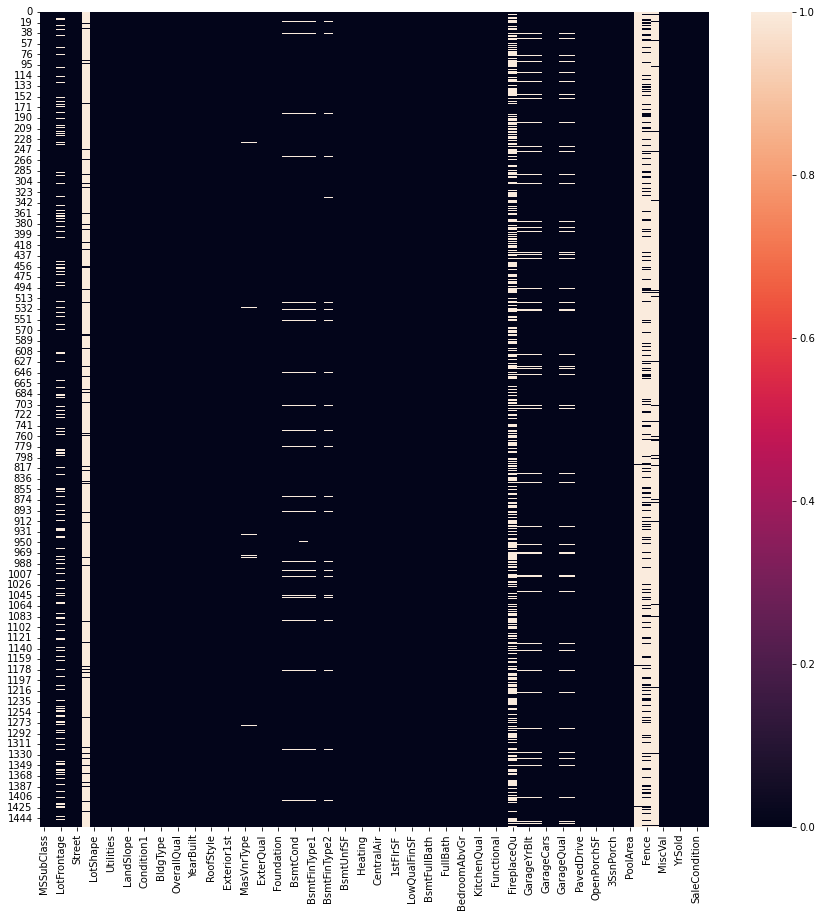

In [81]:
mpl.figure(figsize=[15,15])
sb.heatmap(train_df1.isnull())

### NOTE-1:From above we observe that heatmap containing white shades represnts NA/null values present in its columnn. 

# use as backup -if flawed down the lane

In [82]:
train_df1_copy=train_df1.copy()


In [83]:
train_df1=train_df1_copy.copy()

## D).Imputing missing values(Minimizing # of MISSING VALEUS ) & validate the heatmap again

In [84]:
train_df1['LotFrontage']=train_df1['LotFrontage'].fillna(train_df1['LotFrontage'].mean())
train_df1.drop(['Alley'],axis=1,inplace=True)
train_df1['BsmtCond']=train_df1['BsmtCond'].fillna(train_df1['BsmtCond'].mode()[0])
train_df1['BsmtQual']=train_df1['BsmtQual'].fillna(train_df1['BsmtQual'].mode()[0])
train_df1['FireplaceQu']=train_df1['FireplaceQu'].fillna(train_df1['FireplaceQu'].mode()[0])
train_df1['GarageType']=train_df1['GarageType'].fillna(train_df1['GarageType'].mode()[0])
train_df1.drop(['GarageYrBlt'],axis=1,inplace=True)
train_df1['GarageFinish']=train_df1['GarageFinish'].fillna(train_df1['GarageFinish'].mode()[0])
train_df1['GarageQual']=train_df1['GarageQual'].fillna(train_df1['GarageQual'].mode()[0])
train_df1['GarageCond']=train_df1['GarageCond'].fillna(train_df1['GarageCond'].mode()[0])
train_df1.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

<AxesSubplot:>

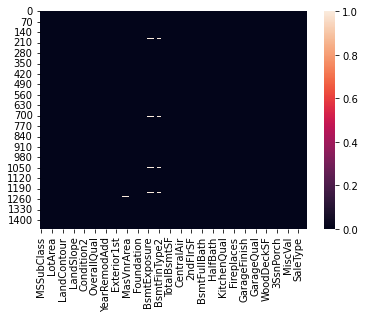

In [85]:
sb.heatmap(train_df1.isnull())

### Note2:if further null/Na values exist post screening/ filtering ,then drop the corresponding row containing the same


(1412, 75)

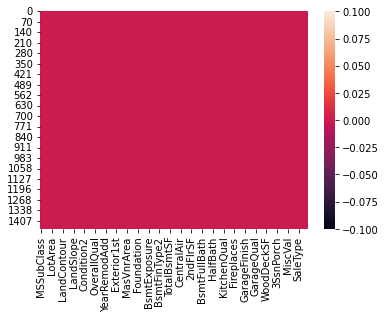

In [86]:
train_df1.dropna(inplace=True) # deleting asscoated records from respective colmn
sb.heatmap(train_df1.isnull())
train_df1.shape

### Note-4:Based on the above missing datain th erespective ,few columns having m,ore thatn 50 % of unknown vlaues , then thesecolumn is discarded, otherwiese the corresponding data is filled with mean/ mode for corresponding columns:

## 4).Segregating the features into corresponding classes-{Numnerical, categorical} & bivariate analysis

## 4A).Numerical Features

In [87]:
# list of numerical variables
numerical_features = [feature for feature in train_df1.columns if train_df1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_df1[numerical_features].head()

Number of numerical variables:  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## NOTE:From the Dataset we have 3 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering 

In [88]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print(f" Year_variable={len(year_feature)}")
year_feature

 Year_variable=3


['YearBuilt', 'YearRemodAdd', 'YrSold']

## 4B). YEAR_WISE bivariate analysis

Text(0.5, 1.0, 'House Price vs YearSold')

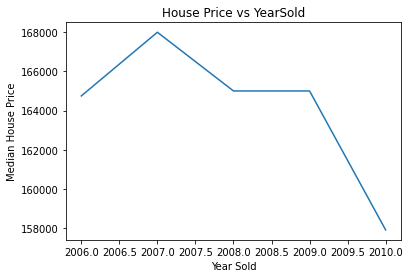

In [89]:
train_df1.groupby('YrSold')['SalePrice'].median().plot()
mpl.xlabel('Year Sold')
mpl.ylabel('Median House Price')
mpl.title("House Price vs YearSold")


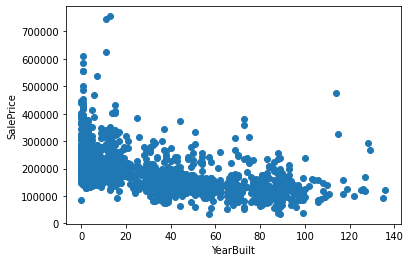

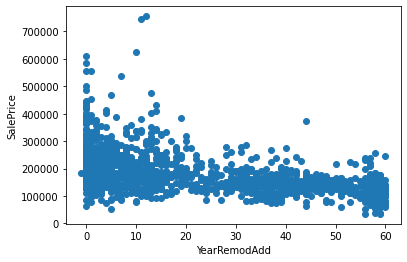

In [90]:
## Here we will compare the difference between All years feature with SalePrice


for feature in year_feature:
    if feature!='YrSold':
        data=train_df1.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        mpl.scatter(data[feature],data['SalePrice'])
        mpl.xlabel(feature)
        mpl.ylabel('SalePrice')
        mpl.show()


## 4C). Numerical variables are usually of 2 type
###  1. Discrete Variables & 2. Continous variable and1. Continous variable

### 1). DISCRETE VARIABLE VS SALEPRICE BIVARIATE ANALSYIS 

In [91]:
discrete_feature=[feature for feature in numerical_features if len(train_df1[feature].unique())<20 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 14


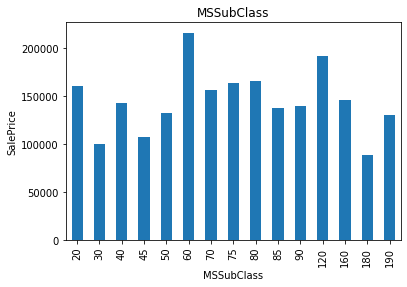

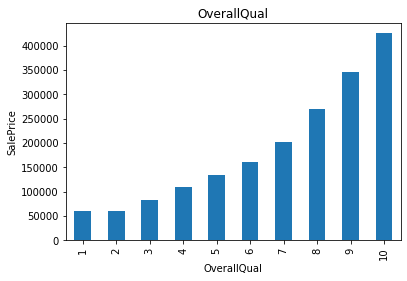

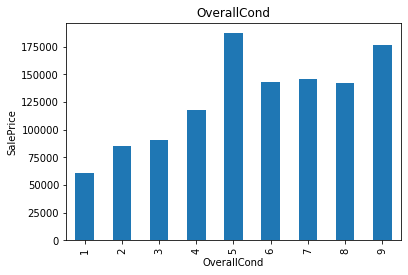

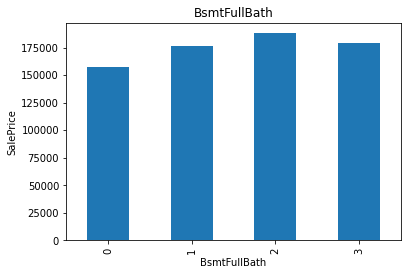

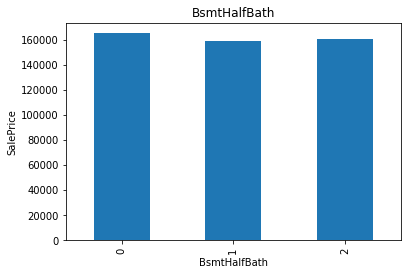

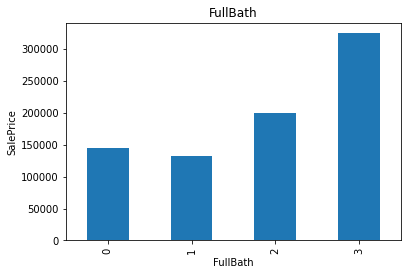

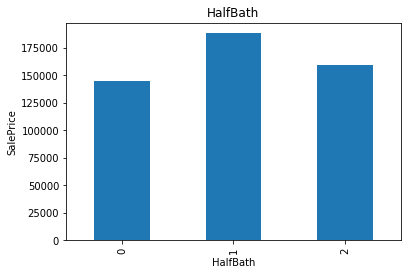

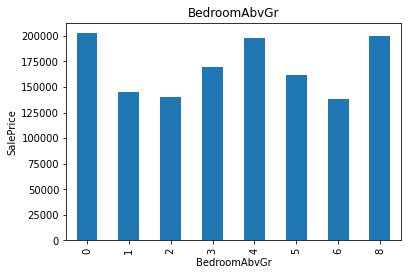

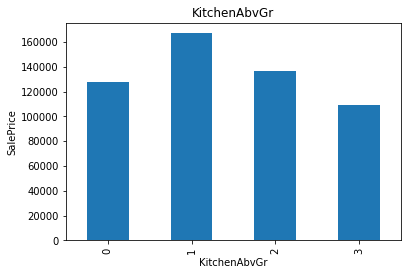

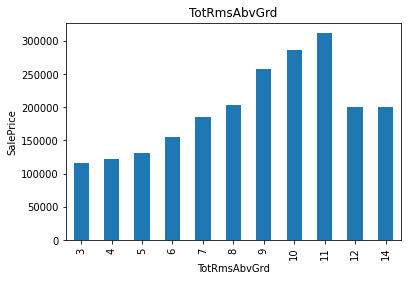

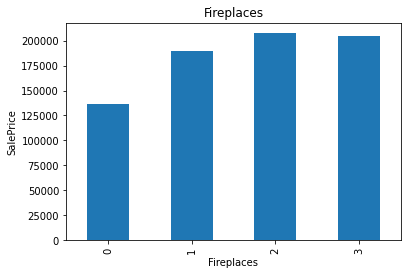

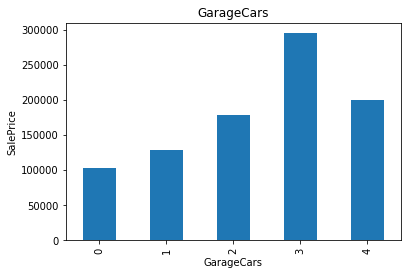

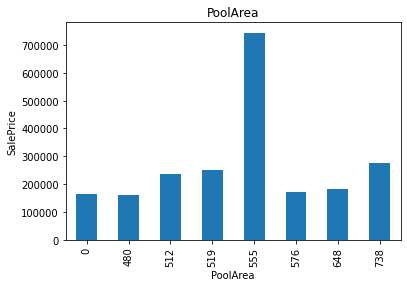

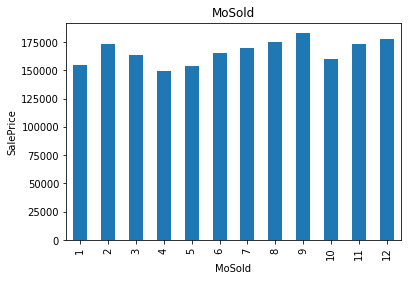

In [92]:
i=0
for feature in discrete_feature:
    i+=1
    data=train_df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    mpl.xlabel(feature)
    mpl.ylabel('SalePrice')
    mpl.title(feature)
    mpl.show()

### THUS THERE EXIST A SIGNIFICANT RELATIONSHIP BETWEEN THE NUMERICAL VAIBL TO THAT OF SALE PRICE

### 2). CONTINUOUS VARIABLE DISTRIBUTION && CONTINUOUS VARIABLE VS SALEPRICE BIVARIATE ANALSYIS 

In [93]:

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


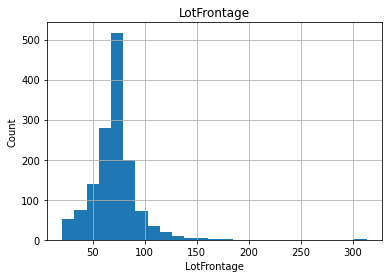

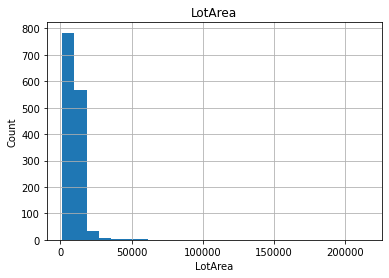

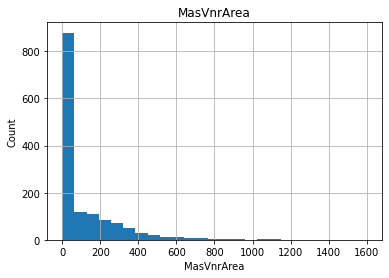

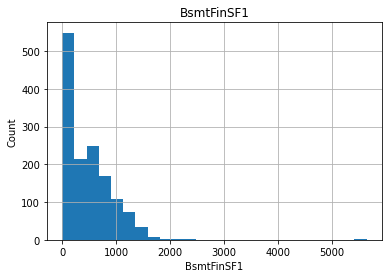

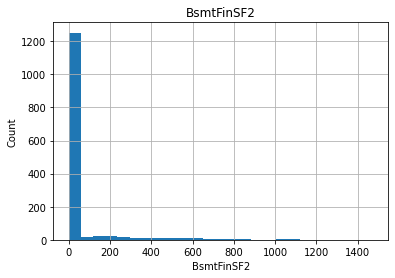

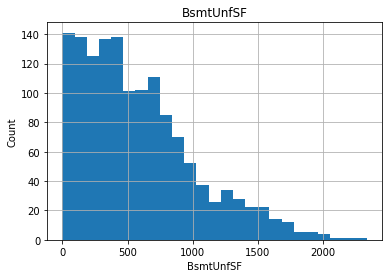

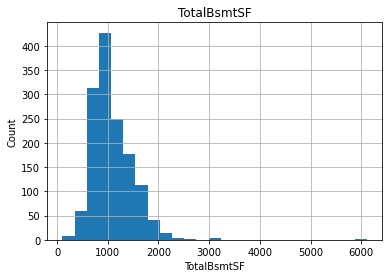

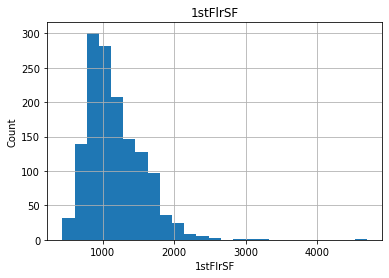

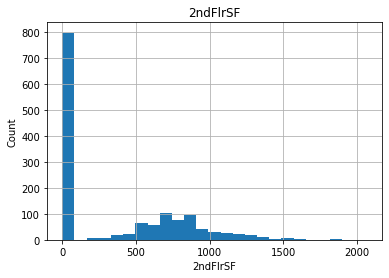

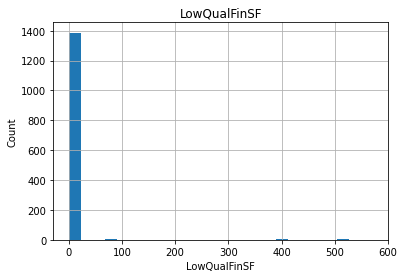

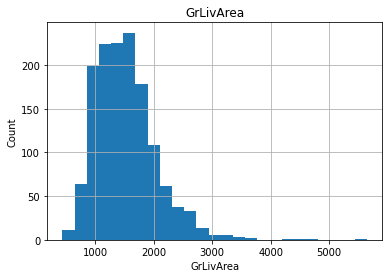

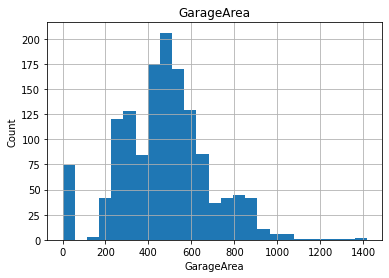

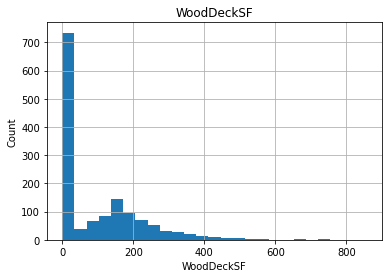

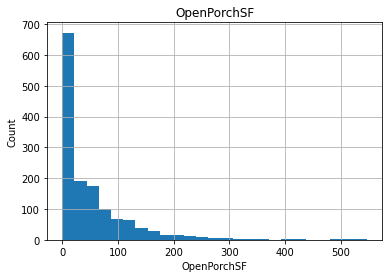

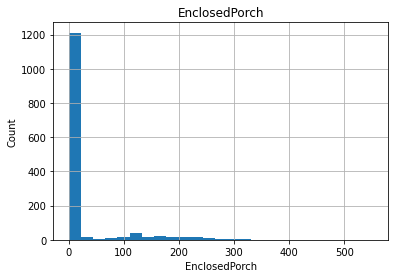

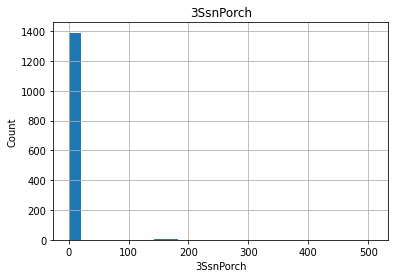

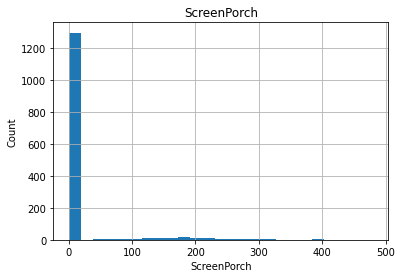

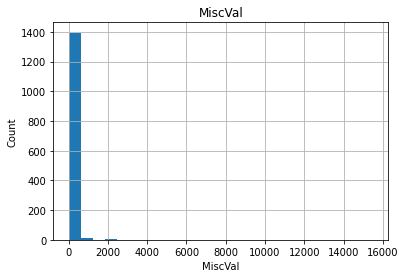

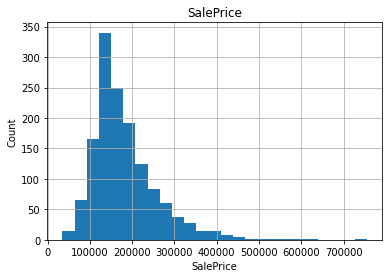

In [94]:
for feature in continuous_feature:
    data=train_df1.copy()
    data[feature].hist(bins=25)
    mpl.xlabel(feature)
    mpl.ylabel("Count")
    mpl.title(feature)
    mpl.show()


### Now bivariate ANALYSIS FOR  continuous variable employing log transformation


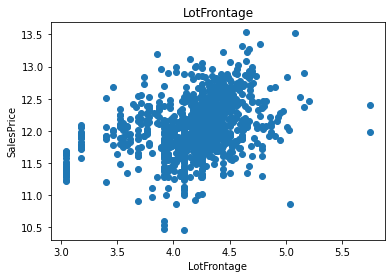

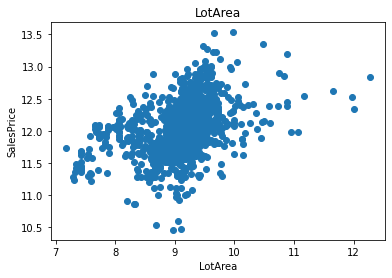

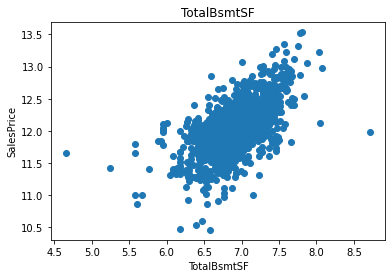

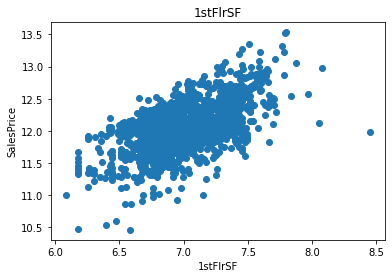

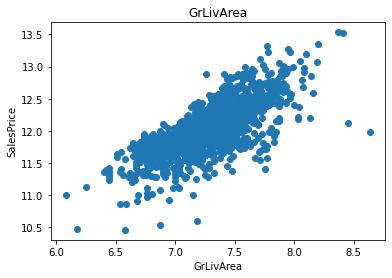

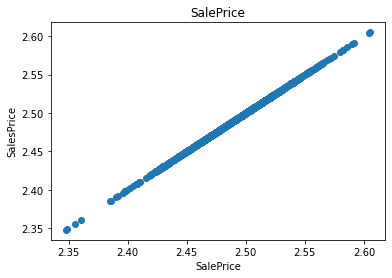

In [95]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=train_df1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        mpl.scatter(data[feature],data['SalePrice'])
        mpl.xlabel(feature)
        mpl.ylabel('SalesPrice')
        mpl.title(feature)
        mpl.show()
        

## 5) OUTLIER DETECTION

### VISUALIZING TH OUTLIER FOR THE ABOVE FEATURES BY PLOTTING BOX PLOT

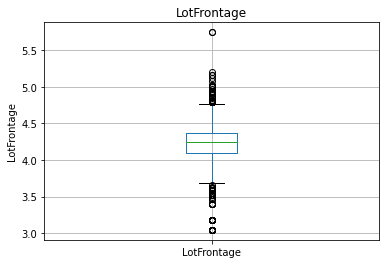

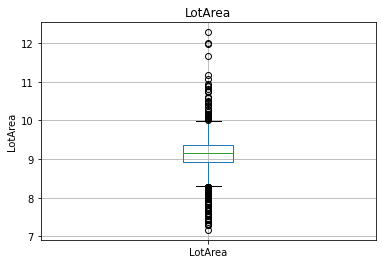

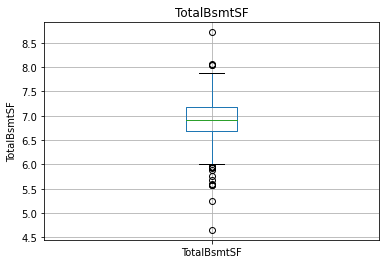

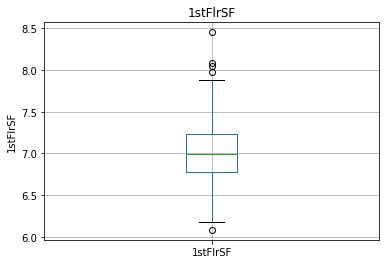

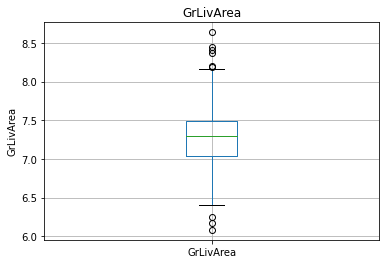

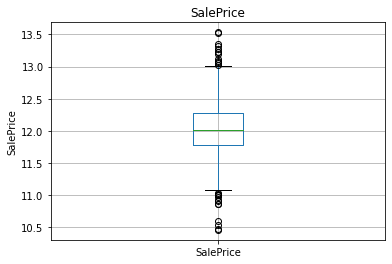

In [96]:
for feature in continuous_feature:
    data=train_df1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        mpl.ylabel(feature)
        mpl.title(feature)
        mpl.show()
        

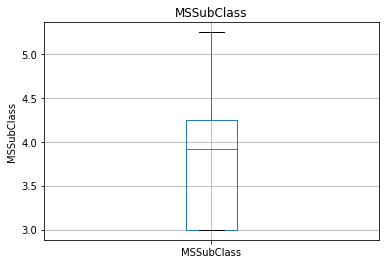

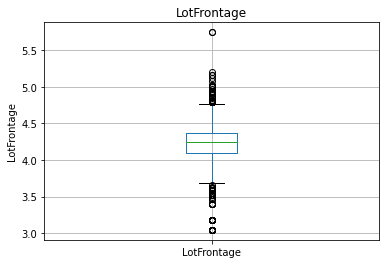

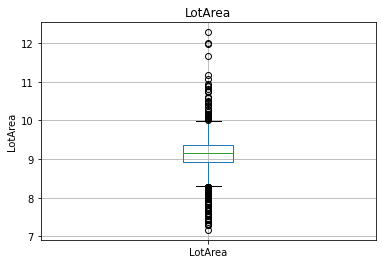

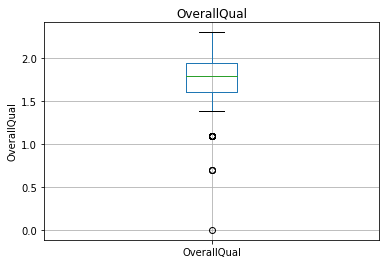

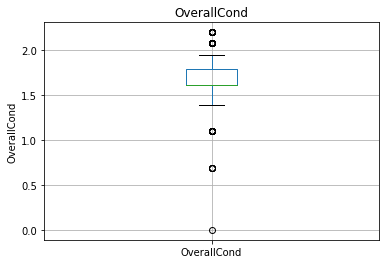

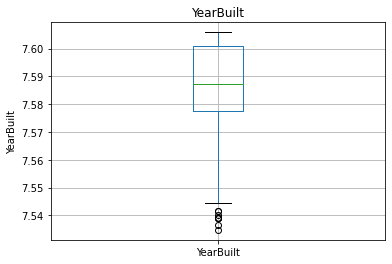

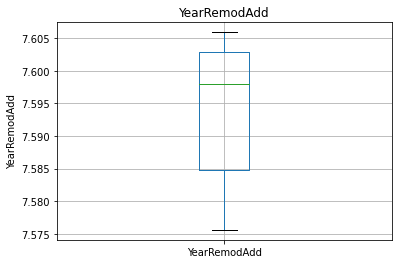

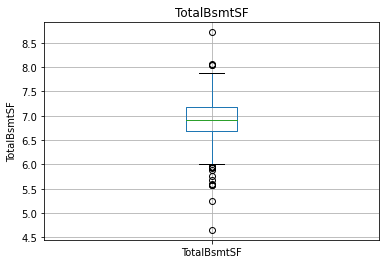

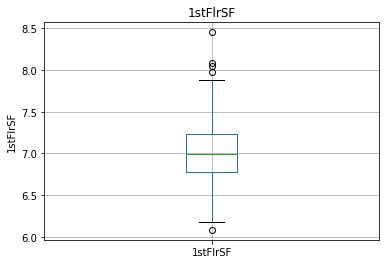

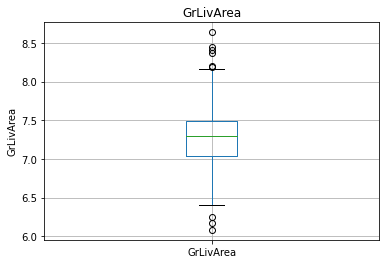

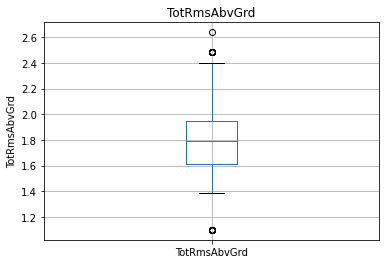

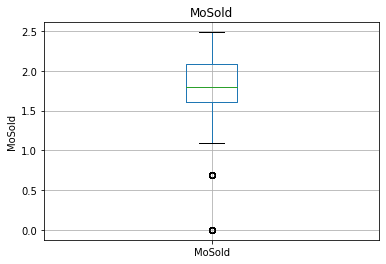

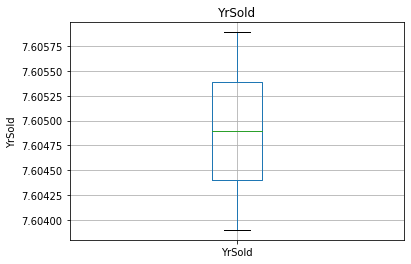

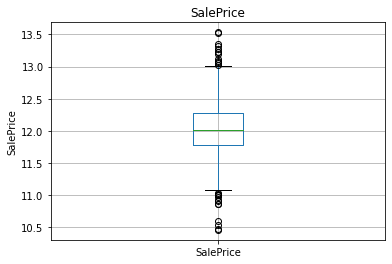

In [97]:
for feature in numerical_features:
    data=train_df1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        mpl.ylabel(feature)
        mpl.title(feature)
        mpl.show()

# 6).Handling Categorical varibles

In [98]:
categorical_features=[feature for feature in train_df1.columns if train_df1[feature].dtypes=='O']
print('count of categorical features=',len(categorical_features))

count of categorical features= 39


In [99]:
train_df1[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


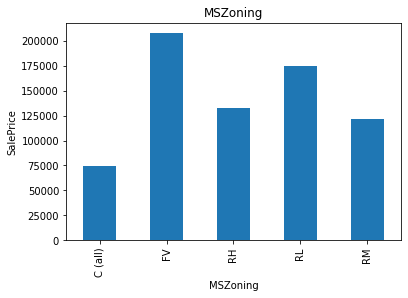

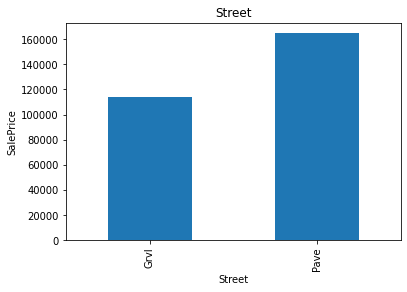

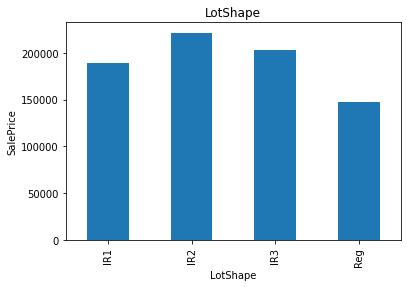

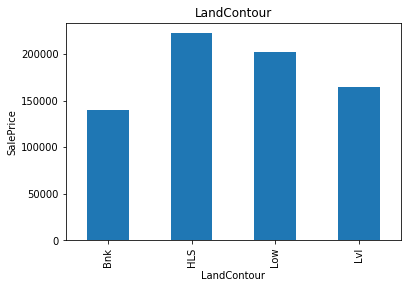

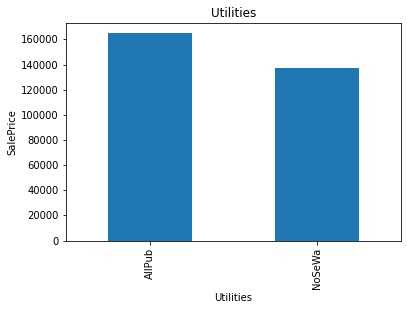

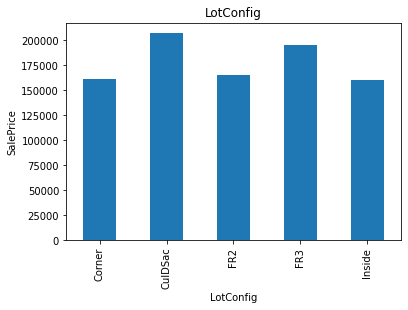

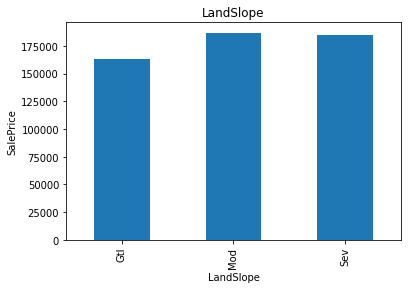

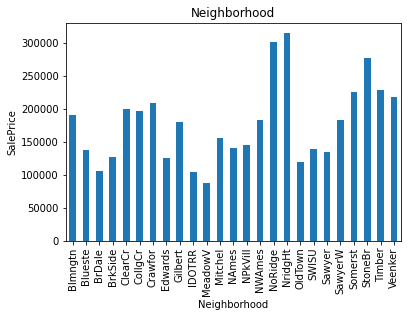

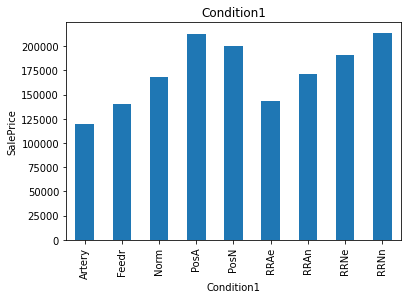

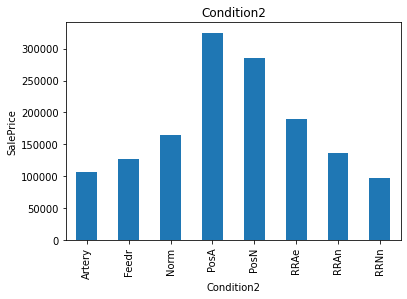

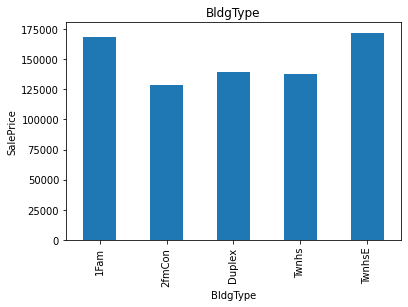

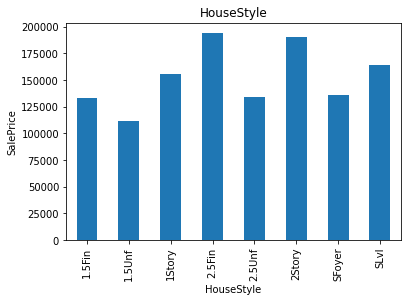

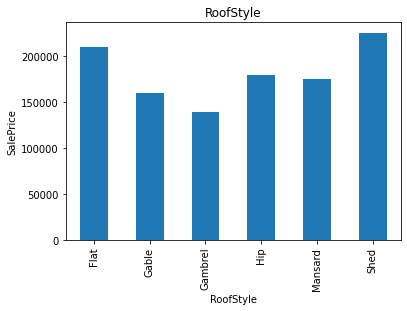

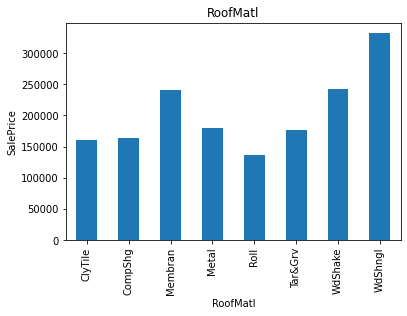

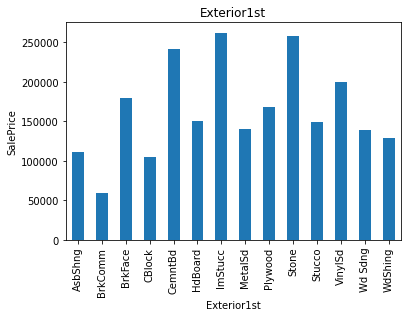

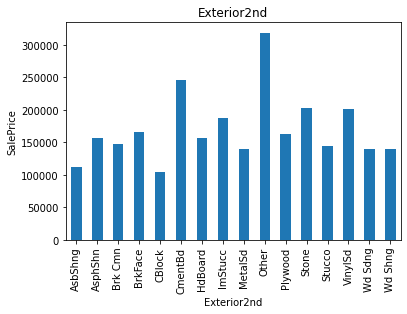

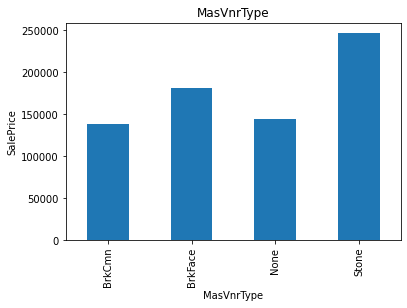

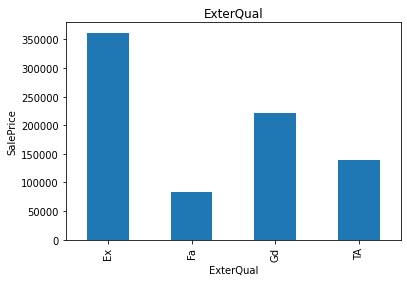

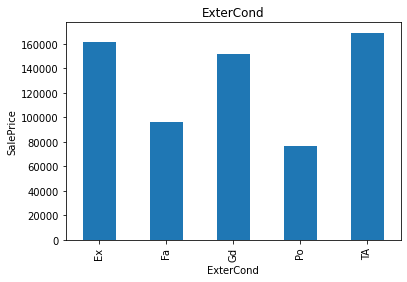

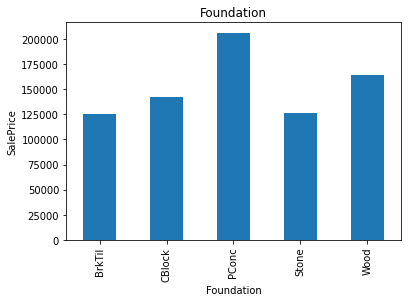

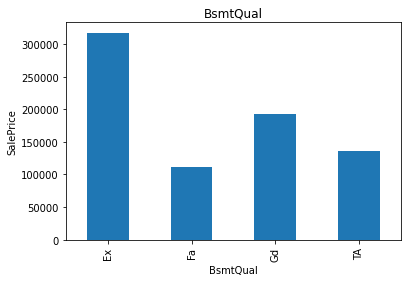

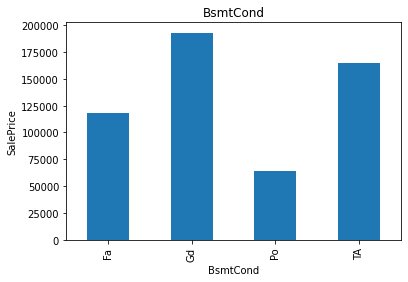

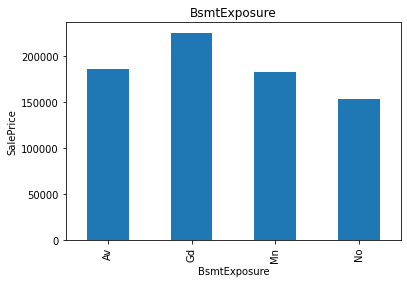

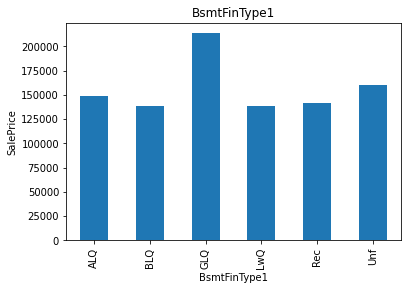

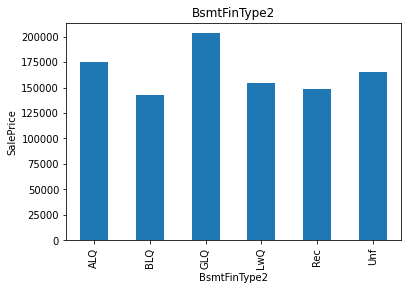

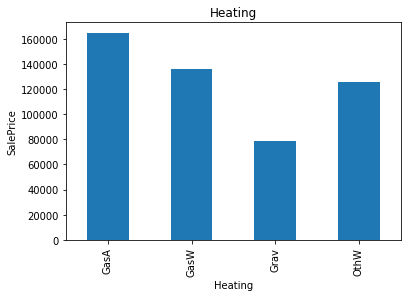

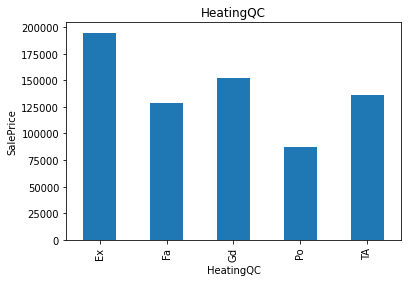

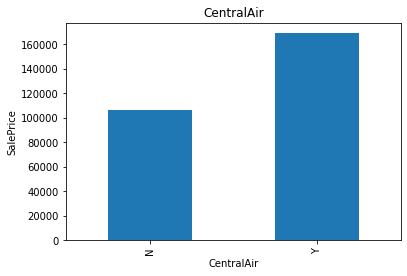

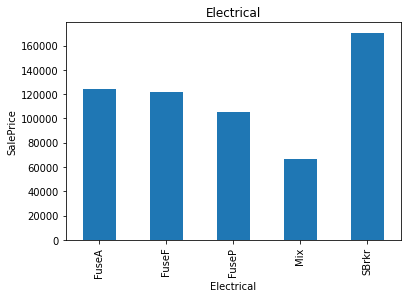

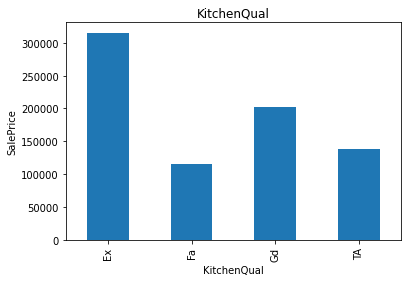

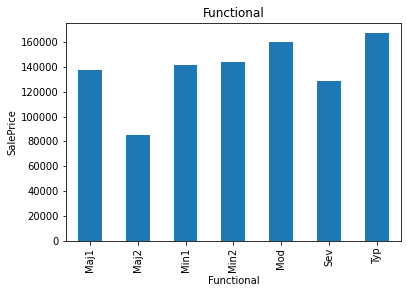

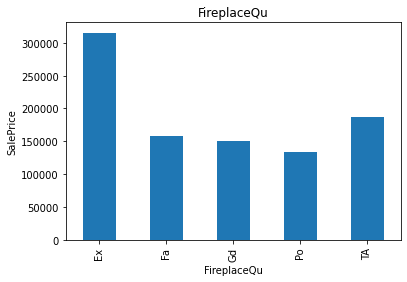

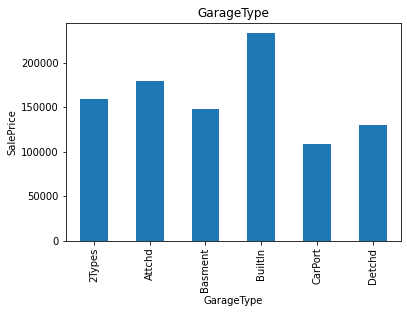

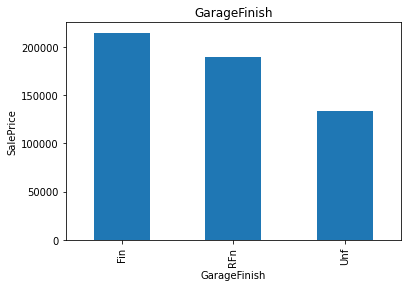

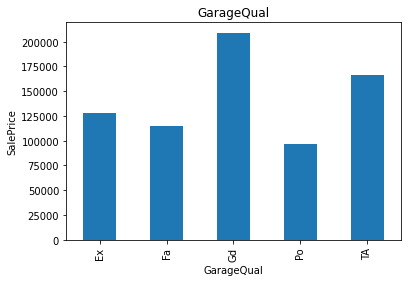

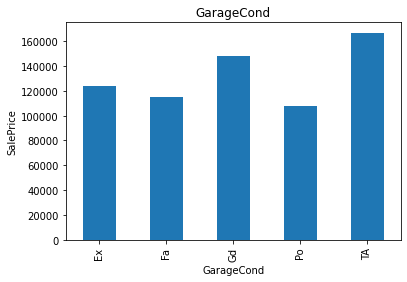

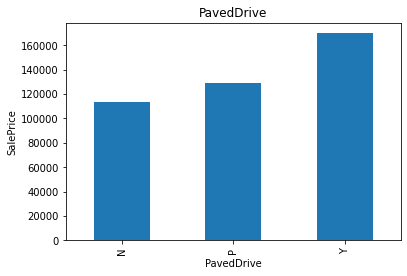

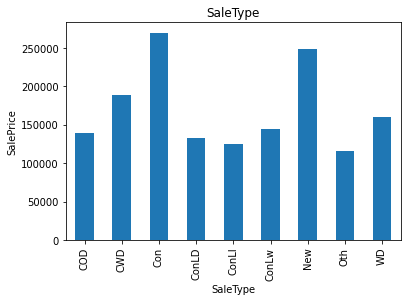

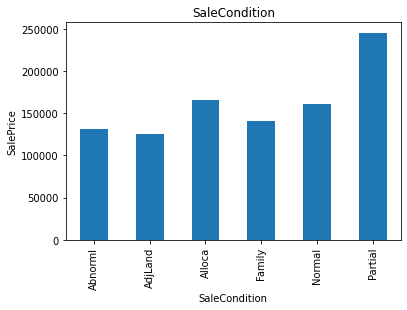

In [100]:
for feature in categorical_features:
    data=train_df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    mpl.xlabel(feature)
    mpl.ylabel('SalePrice')
    mpl.title(feature)
    mpl.show()


# NOTE-4:
## As showcased earlier that distribution of target variable is skewed towards right, thus its advised to fit the targetinto Normal distribtion for , since most of the statistical analysis & test rely on normal distribtuion 
## &
## Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution

In [101]:
train_df1.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1412, dtype: int64

## REINSTATING DISTRIBTUIOIN OF THE tARGET VARIABLE TO PERFORM TANSFORMATION TO CONFORM TO NORMAL DISTRIBTION 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


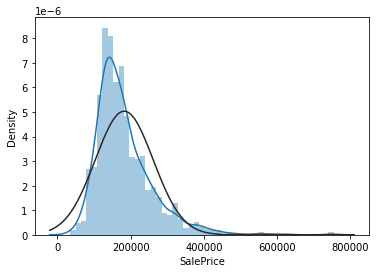

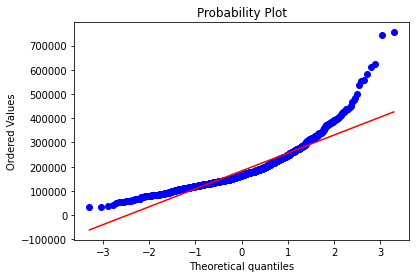

In [102]:
sb.distplot(train_df1['SalePrice'], fit=norm);
fig = mpl.figure()
res = stats.probplot(train_df1['SalePrice'], plot=mpl)

In [103]:
train_df1['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1412, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1412, 75)


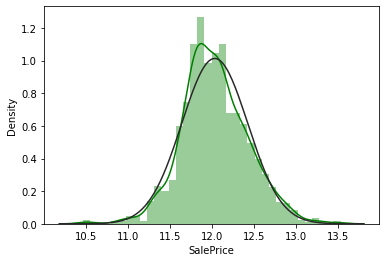

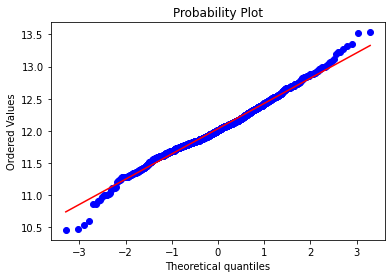

In [104]:
train_df1['SalePrice']=np.log(train_df1['SalePrice'])
sb.distplot(train_df1['SalePrice'], fit=norm,color='green');
fig = mpl.figure()
res = stats.probplot(train_df1['SalePrice'], plot=mpl)
print(train_df1.shape)

### NOTE-5:THUS ABOVE LOG TRANSFORMATIO IS PERFORMED , SINCE MOST OF STATISTICAL ANALYSIS IS DEPENDENT SUCH DISTRIBTION FOR SOLVING REGRESSION BASED APPROACHES/

In [105]:
train_df1['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1412, dtype: float64

### Similar is th case with other corresponding features

In [106]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    train_df1[feature]=np.log(train_df1[feature])

# 7A). CORREALTION BETWEEN EACH OF THE FEATURES(BIGGER PICTURE)

<AxesSubplot:>

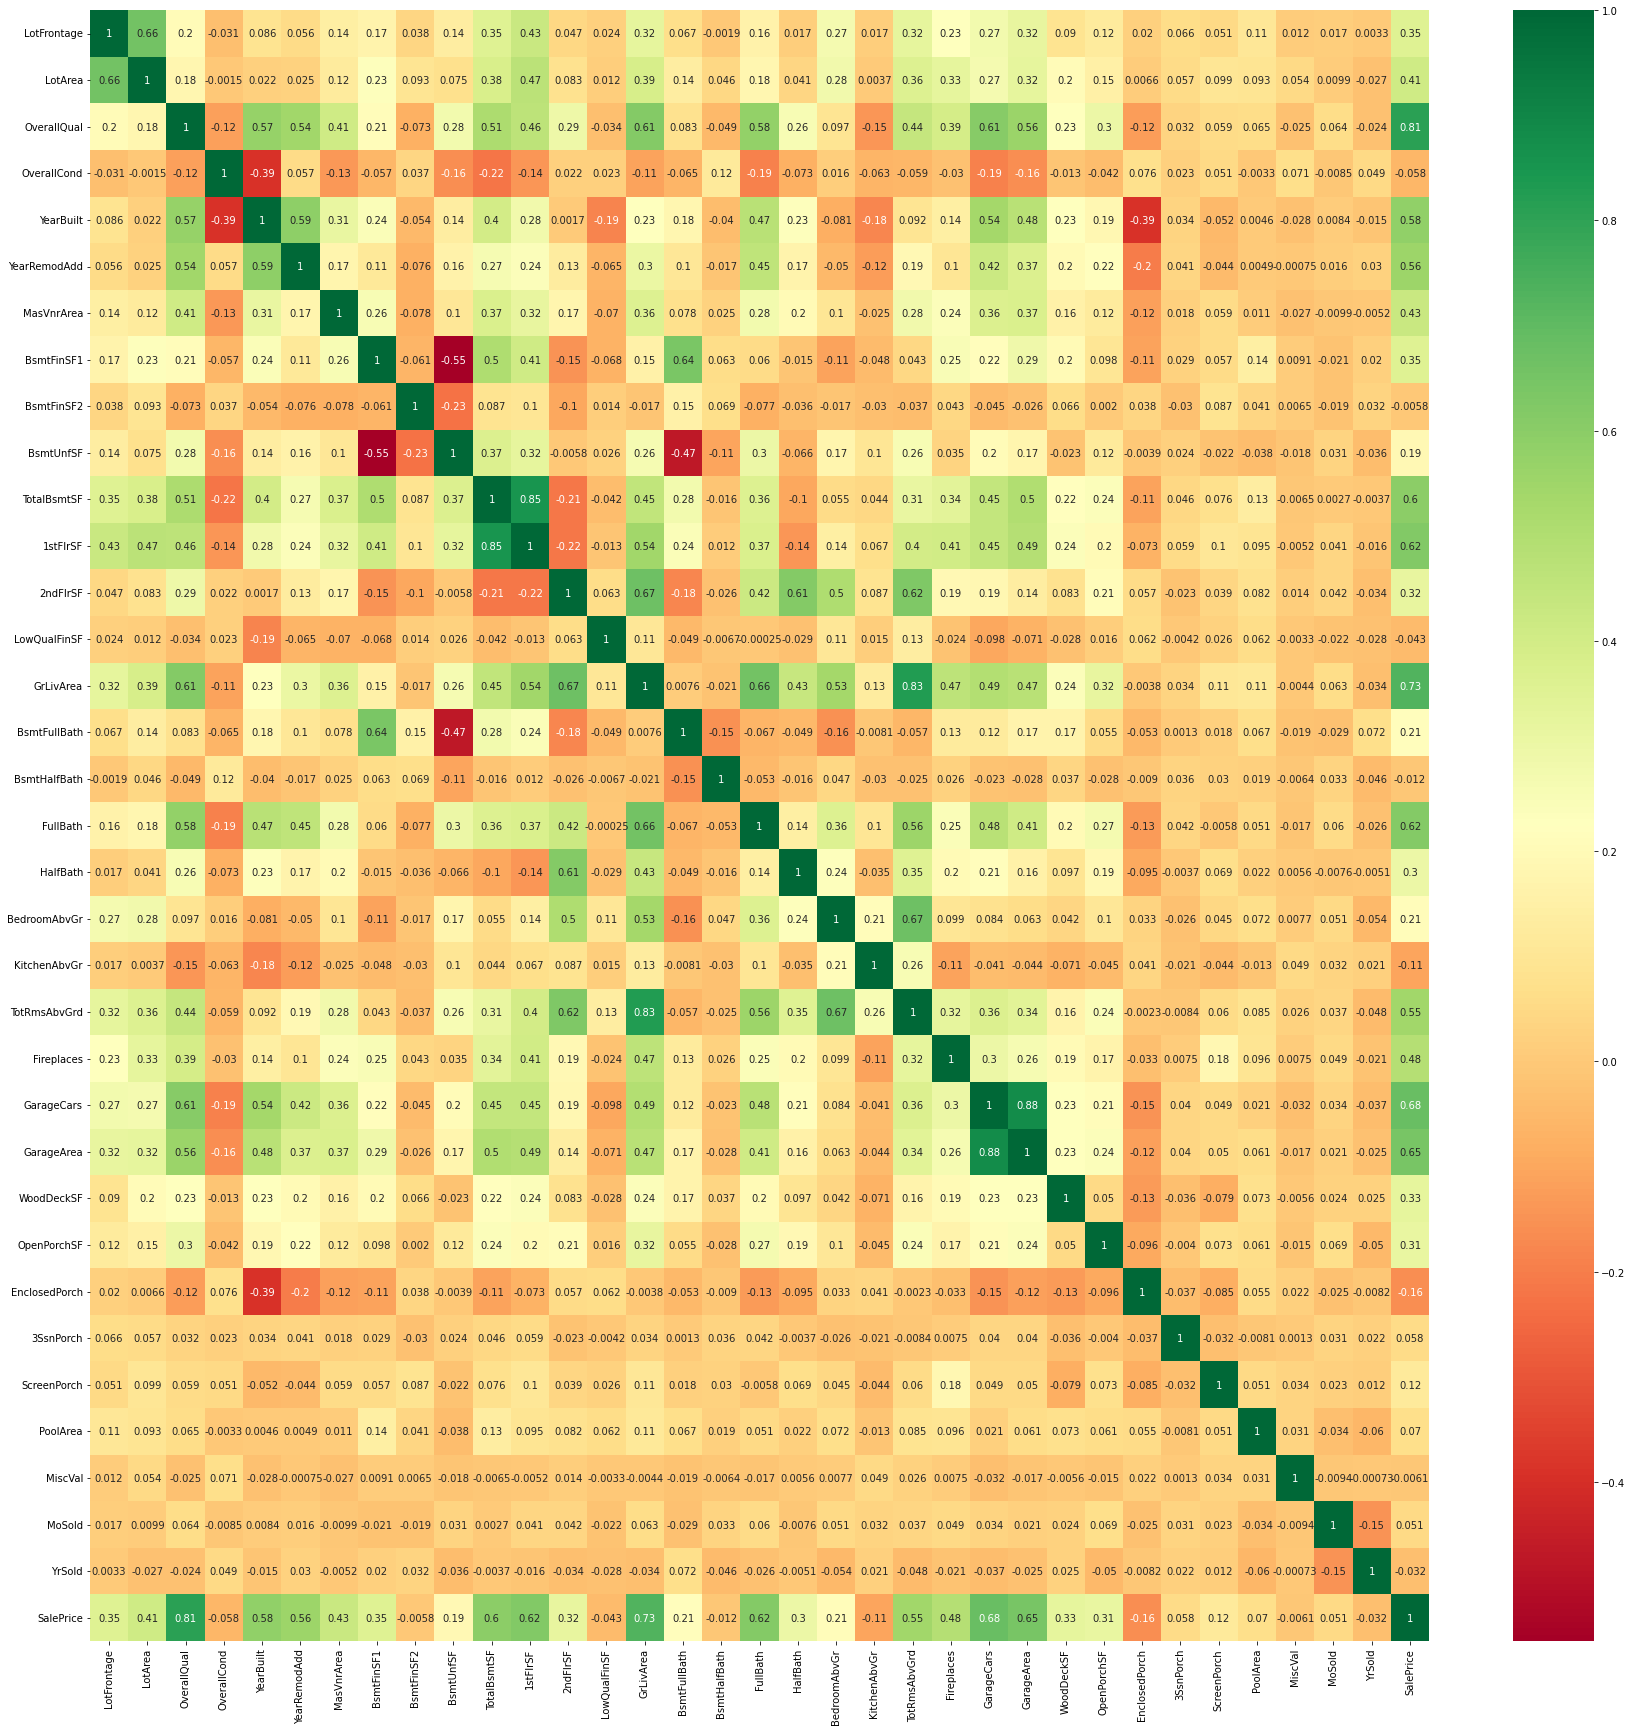

In [107]:
mpl.figure(figsize=(30,30))
train_df1_corr=train_df1.iloc[:,1:].corr(method="pearson")
sb.heatmap(train_df1_corr,cmap="RdYlGn",annot=True)

In [108]:
train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


# 7B). CO-RELATION BETWEEN FEATURES & TARGET VARIABLE(BIGGER PICTURE)

<AxesSubplot:>

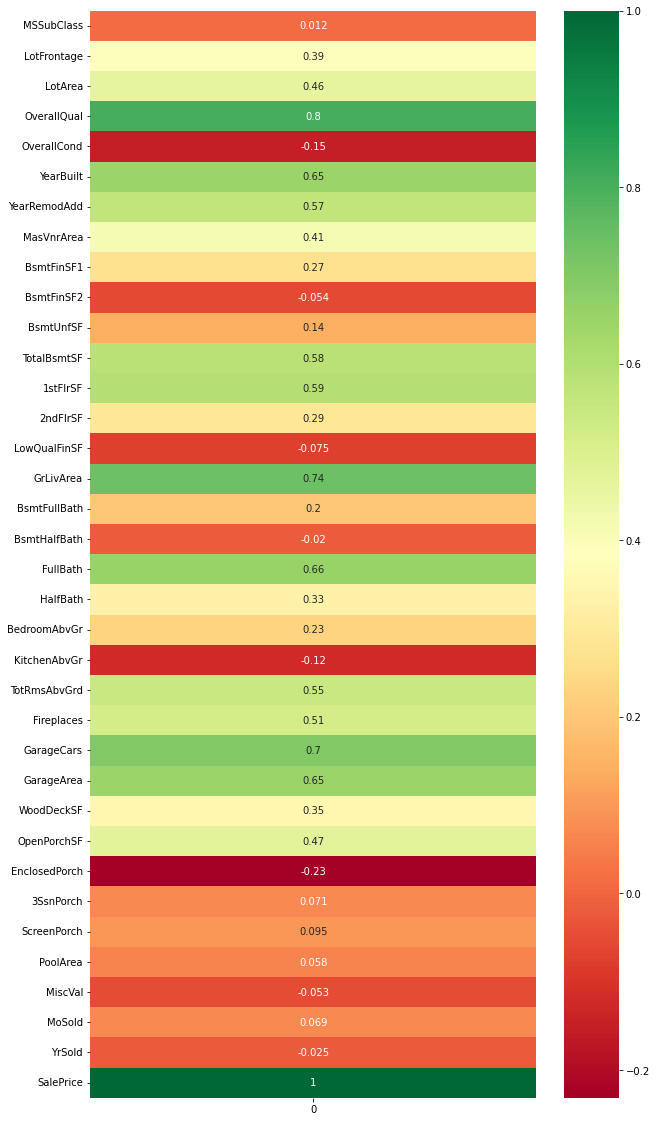

In [109]:
train_df1_corrwith_DATAFRAME=pd.DataFrame(train_df1.iloc[:,:].corrwith(train_df1.iloc[:,-1],method="spearman"))
# type(train_df1_corrwith_DATAFRAME)
# train_df1_corrwith_DATAFRAME=pd.DataFrame(train_df1_corrwith)
mpl.figure(figsize=(10,20))
sb.heatmap(train_df1_corrwith_DATAFRAME,annot=True,cmap="RdYlGn",)
# train_df1_corrwith_DATAFRAME[train_df1_corrwith_DATAFRAME>=0.5,]

## 8). handling rare categorical variable(IF PERCENTAGE IS <1%)

In [110]:
categorical_features=[feature for feature in train_df1.columns if train_df1[feature].dtype=='O']
for feature in categorical_features:
    temp=train_df1.groupby(feature)['SalePrice'].count()/len(train_df1)
    temp_df=temp[temp>0.01].index
    train_df1[feature]=np.where(train_df1[feature].isin(temp_df),train_df1[feature],'Rare_var')

In [111]:
# def category_onehot_multcols(multcolumns):
#     df_final=final_df
#     i=0
#     for fields in multcolumns:
        
#         print(fields)
#         df1=pd.get_dummies(final_df[fields],drop_first=True)
        
#         final_df.drop([fields],axis=1,inplace=True)
#         if i==0:
#             df_final=df1.copy()
#         else:
            
#             df_final=pd.concat([df_final,df1],axis=1)
#         i=i+1
       
        
#     df_final=pd.concat([final_df,df_final],axis=1)
        
#     return df_final 

# 9). ENCODING CATEGORICAL TO NUMERICAL VARIBLES FRO APPLYING ML MODELS

In [112]:
train_df1_enclosed=pd.get_dummies(train_df1,drop_first=True)
print(train_df1_enclosed.shape)


# X_train_trim,Y_train_trim=train_df1_trimmed.iloc[:,:-1],train_df1_trimmed.iloc[:,-1]

(1412, 184)


In [113]:
# final_df =train_df1.loc[:,~train_df1.columns.duplicated()]
# final_df.shape

# 10). "Feature Scaling"

In [114]:
feature_scale=[feature for feature in train_df1_enclosed.columns if feature not in ['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df1_enclosed[feature_scale])

MinMaxScaler()

In [115]:
scaler.transform(train_df1_enclosed[feature_scale])


array([[0.23529412, 0.41820812, 0.3663439 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.49506375, 0.39131677, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.4223585 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.42385922, 0.37959669, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.434909  , 0.39368765, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.47117546, 0.39806941, ..., 1.        , 0.        ,
        0.        ]])

In [116]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train_df1[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_df1_enclosed[feature_scale]), columns=feature_scale)],axis=1)

In [117]:
data.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [118]:
data.shape

(1412, 184)

# 11). STORE FOR FUTURE PURPOSES

In [119]:
data.to_csv("./final_data1_global1.csv")

In [120]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [124]:
data.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [125]:
data.iloc[:,0]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1407    12.072541
1408    12.254863
1409    12.493130
1410    11.864462
1411    11.901583
Name: SalePrice, Length: 1412, dtype: float64

# 12) TRAIN-TEST SPLIT

In [126]:
X_train,X_val_test,Y_train,Y_val_test=train_test_split(data.iloc[:,1:],data.iloc[:,0],train_size=0.7,random_state=0)

## Apply Feature Selection
## first, we specify the Lasso Regression model, and following which we select a suitable alpha (equivalent of penalty).

## The bigger the alpha the less features that will be selected.

## Then we use the selectFromModel object from sklearn, which
## selects the features which coefficients are non-zero

# 13)MODEL & METRICS-RESULT
### {BELOW IS THE MODEL IMPLICATION WITH OPTIMIZED HYPERAPARAMETERS & THAT AIDS IN SQUASHING THE REQUIRED NO OF MANDATORY FEATURES THAT IMPACTS SALEPRICE WITH DISTINGUISHED CROSSVALIDATION SCHEMES.}

## 13) Regression techniques

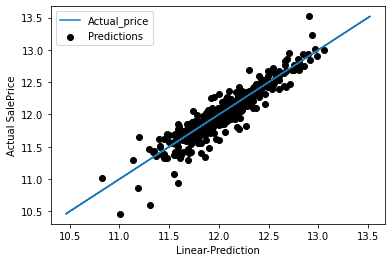

In [151]:
def technique_1(regressors):

    feature_sel_model = SelectFromModel(regressors) # remember to set the seed, the random state in this function
    feature_sel_model.fit(X_train, Y_train)

    feature_sel_model.get_support()

    # let's print the number of total and selected features

    # this is how we can make a list of the selected features
    selected_feat = X_train.columns[(feature_sel_model.get_support())]

    # let's print some stats
    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    # print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

    print(selected_feat)

    ## thus importnt features that has an significant impact on the predciton of Selling price when coupled iwth lasso with desirable hyperparameter

    X_train1=X_train[selected_feat].copy()

    modeller=regressors


    from sklearn.model_selection import cross_val_score
    rmse0=np.sqrt(-1*(cross_val_score(modeller,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')))
    print(f"mse0={rmse0}")

    modeller.fit(X_train1,Y_train)# finds mse(instead of mean & variance? bassed on what type of scoring is important ) for each of the lambda values 

    ypred=modeller.predict(X_val_test[selected_feat])
    ypred.shape

    from sklearn.metrics import mean_squared_error,r2_score
    R2_score_0=r2_score(ypred,Y_val_test)
    print(f"r2_score={R2_score_0}")
    rmse_0=np.sqrt((mean_squared_error(Y_val_test,ypred)))

    print(f"mse_score={rmse_0}")
    mpl.figure(figsize=[10,10])
    mpl.plot(Y_val_test,Y_val_test,label="Actual_price")
    mpl.scatter(ypred,Y_val_test,color="black",label="Predictions")
    mpl.xlabel("Linear-Prediction")
    mpl.ylabel("Actual SalePrice")
    mpl.legend()

## A. LINEARREGRESSION

In [130]:
regressors=LinearRegression()
technique_1(regressors)

# regressor=Lasso(alpha=0.005, random_state=0)
# technique_1(regressor)

# regressor=Ridge(alpha=0.005, random_state=0)
# technique_1(regressor)

total features: 183
selected features: 4
Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], dtype='object')
mse0=[7.04660550e+08 1.95759716e+07 2.34912603e+02 3.72607431e-01
 1.34843117e-01]
r2_score=-1.1735329741991434
mse_score=0.3060252573217613


## B. LASSO-REGRESSION

total features: 183
selected features: 25
Index(['OverallQual', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'Fireplaces',
       'GarageCars', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Condition1_Norm',
       'RoofStyle_Hip', 'MasVnrType_None', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'CentralAir_Y', 'KitchenQual_TA',
       'GarageFinish_Unf', 'SaleType_New'],
      dtype='object')
{'alpha': 0.005}
-0.025242074191128984
r2_score=0.7506679861328129


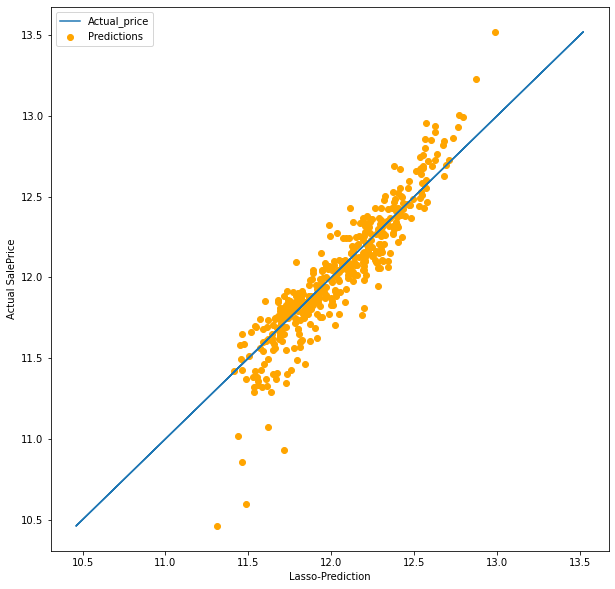

In [149]:


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, Y_train)

feature_sel_model.get_support()

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

print(selected_feat)

## thus importnt features that has an significant impact on the predciton of Selling price when coupled iwth lasso with desirable hyperparameter

X_train1=X_train[selected_feat].copy()

lasso=Lasso()

lasso_reg=GridSearchCV(lasso,param_grid={"alpha":[0.005]},scoring="neg_mean_squared_error",cv=5)


lasso_reg.fit(X_train1,Y_train)# finds mse(instead of mean & variance? bassed on what type of scoring is important ) for each of the lambda values 
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)
ypred=lasso_reg.predict(X_val_test[selected_feat])
ypred.shape

from sklearn.metrics import mean_squared_error,r2_score
R2_score_1=r2_score(ypred,Y_val_test)
print(f"r2_score={R2_score_1}")
mse_1=np.sqrt(mean_squared_error(Y_val_test,ypred))
f"mse_score={mse_1}"
mpl.figure(figsize=[10,10])
mpl.plot(Y_val_test,Y_val_test,label="Actual_price")
mpl.scatter(ypred,Y_val_test,color="orange",label="Predictions")
mpl.xlabel("Lasso-Prediction")
mpl.ylabel("Actual SalePrice")
mpl.legend()


## C.. RIDGE-REGRESSION

total features: 183
selected features: 53
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'MSZoning_RM', 'MSZoning_Rare_var',
       'Street_Rare_var', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_Rare_var', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_Rare_var',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Rare_var', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Rare_var',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',

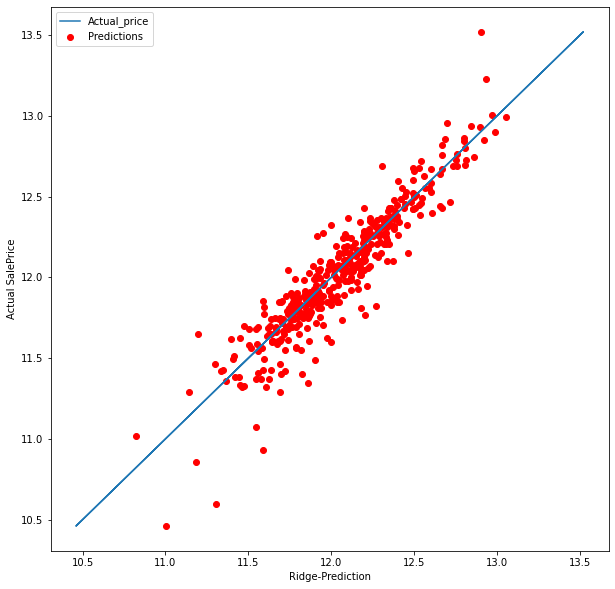

In [150]:


feature_sel_model = SelectFromModel(Ridge(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, Y_train)

feature_sel_model.get_support()

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

print(selected_feat)

## thus importnt features that has an significant impact on the predciton of Selling price when coupled iwth lasso with desirable hyperparameter

X_train1=X_train[selected_feat].copy()

ridge=Ridge()

ridge_reg=GridSearchCV(ridge,param_grid={"alpha":[0.005]},scoring="neg_mean_squared_error",cv=5)


ridge_reg.fit(X_train1,Y_train)# finds mse(instead of mean & variance? bassed on what type of scoring is important ) for each of the lambda values 
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
ypred=ridge_reg.predict(X_val_test[selected_feat])
ypred.shape

from sklearn.metrics import mean_squared_error,r2_score
R2_score_2=r2_score(ypred,Y_val_test)
print(f"r2_score={R2_score_2}")
mse_2=np.sqrt(mean_squared_error(Y_val_test,ypred))
f"mse_score={mse_2}"
mpl.figure(figsize=[10,10])
mpl.plot(Y_val_test,Y_val_test,label="Actual_price")
mpl.scatter(ypred,Y_val_test,color="red",label="Predictions")
mpl.xlabel("Ridge-Prediction")
mpl.ylabel("Actual SalePrice")
mpl.legend()

# 14). Applying Ensembling techniques

In [ ]:
# feature_sel_model = SelectFromModel(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)) # remember to set the seed, the random state in this function
# feature_sel_model.fit(X_train, Y_train)

# feature_sel_model.get_support()

# # let's print the number of total and selected features

# # this is how we can make a list of the selected features
# selected_feat = X_train.columns[(feature_sel_model.get_support())]

# # let's print some stats
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# # print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

# print(selected_feat)

# ## thus importnt features that has an significant impact on the predciton of Selling price when coupled iwth lasso with desirable hyperparameter

# X_train1=X_train[selected_feat].copy()

# GradBoost=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

# Grad_boost=GridSearchCV(GradBoost,param_grid={"alpha":[0.05]},scoring="neg_mean_squared_error",cv=5)


# Grad_boost.fit(X_train1,Y_train)# finds mse(instead of mean & variance? bassed on what type of scoring is important ) for each of the lambda values 
# print(Grad_boost.best_params_)
# print(Grad_boost.best_score_)
# ypred=Grad_boost.predict(X_val_test[selected_feat])
# ypred.shape

# from sklearn.metrics import mean_squared_error,r2_score
# R2_score_3=r2_score(ypred,Y_val_test)
# print(f"r2_score={R2_score_3}")
# mse_3=mean_squared_error(Y_val_test,ypred)
# f"mse_score={mse_3}"


## Defining generalized model to extract salinet features from the given set .

In [161]:
def technique(model1,i,j):
    feature_sel_model = SelectFromModel(model1) # remember to set the seed, the random state in this function
    feature_sel_model.fit(X_train, Y_train)

    feature_sel_model.get_support()

    # let's print the number of total and selected features

    # this is how we can make a list of the selected features
    selected_feat = X_train.columns[(feature_sel_model.get_support())]

    # let's print some stats
    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    # print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

    print(selected_feat)

    ## thus importnt features that has an significant impact on the predciton of Selling price when coupled iwth lasso with desirable hyperparameter

    X_train1=X_train[selected_feat].copy()

   
    Grad_boost=GridSearchCV(model1,param_grid={"alpha":[0.05]},scoring="neg_mean_squared_error",cv=5)


    Grad_boost.fit(X_train1,Y_train)# finds mse(instead of mean & variance? bassed on what type of scoring is important ) for each of the lambda values 
    print(Grad_boost.best_params_)
    print(Grad_boost.best_score_)
    
    """test the model over test data"""
    ypred=Grad_boost.predict(X_val_test[selected_feat])
    ypred.shape

    from sklearn.metrics import mean_squared_error,r2_score
    R2_score_3=r2_score(ypred,Y_val_test)
    print(f"r2_score={R2_score_3}")
    mse_3=np.sqrt(mean_squared_error(Y_val_test,ypred))
    print(f"mse_score={mse_3}")
    mpl.figure(figsize=[10,10])
    mpl.plot(Y_val_test,Y_val_test,label="Actual_price")
    mpl.scatter(ypred,Y_val_test,color=j,label=f"{i}-Predictions")
    mpl.xlabel(f"{i}-Prediction")
    mpl.ylabel("Actual SalePrice")
    mpl.legend()

## applying various boosting models

## A) GRADBOOST

total features: 183
selected features: 31
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MSZoning_RM', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtFinType1_GLQ', 'KitchenQual_TA',
       'GarageType_Detchd', 'GarageFinish_Unf'],
      dtype='object')
{'alpha': 0.05}
-0.01827517210821606
r2_score=0.8472086937873662
mse_score=0.1361601190946043


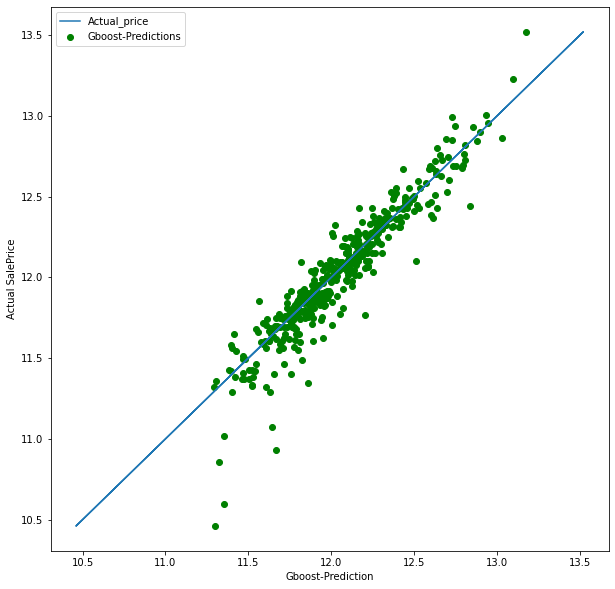

In [165]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
technique(GBoost,"Gboost","green")

## B) XGBOOST

[00:48:37] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


total features: 183
selected features: 42
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
       'MSZoning_RL', 'MSZoning_RM', 'MSZoning_Rare_var',
       'Neighborhood_CollgCr', 'Neighborhood_IDOTRR', 'Neighborhood_NWAmes',
       'Condition1_Feedr', 'Condition1_PosN', 'Condition2_Rare_var',
       'BldgType_Duplex', 'Exterior1st_Rare_var', 'Exterior2nd_Wd Shng',
       'ExterQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'BsmtF

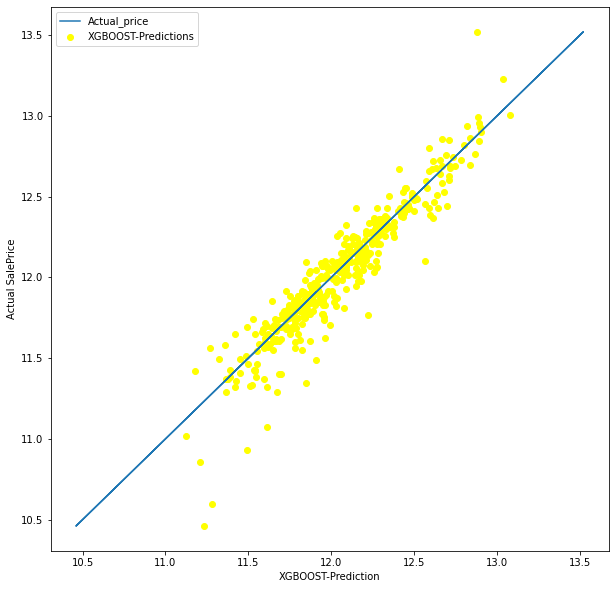

In [163]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
technique(model_xgb,"XGBOOST","yellow")

## C) LIGHTNINGBOOST

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
total features: 183
selected features: 40
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodD

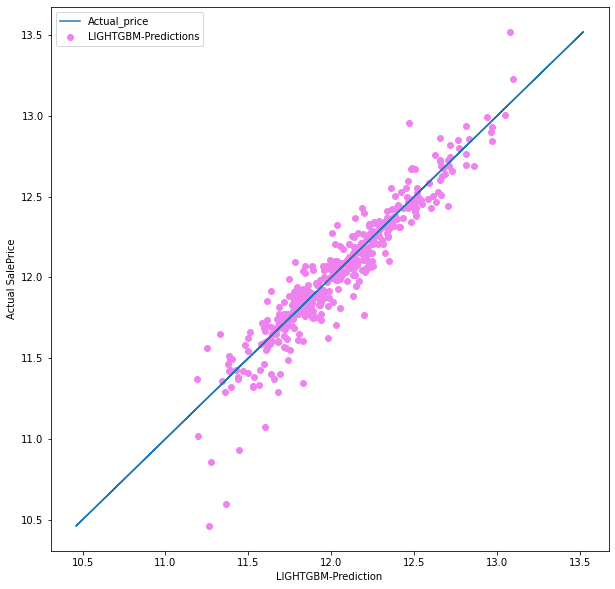

In [162]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
technique(model_lgb,"LIGHTGBM","VIOLET")

In [174]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)
        mpl.savefig(figsize=[10,10])
        mpl.plot(Y_val_test,Y_val_test,label="Actual_price")
        mpl.scatter(ypred,Y_val_test,color=j,label=f"{i}-Predictions")
        mpl.xlabel(f"{iPrediction")
        mpl.ylabel("Actual SalePrice")
        mpl.legend()
        

In [170]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [171]:
averaged_models = AveragingModels(models = (model_lgb,model_xgb,GBoost))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))  

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[00:56:52] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_f